In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

In [41]:
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_final.csv")
df_w = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_weather.csv")

**Trip Count**

Testing

In [42]:
data = pd.DataFrame()
data['time']= df.weekday

# data = data.groupby([data['time']]).mean()
data['time'] = df.weekday.value_counts()
# data.sort_values('time', inplace=True)
data.sort_index(inplace=True)
# data

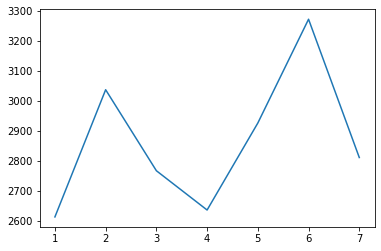

In [43]:
plt.plot(data.index, data['time'], label='Weekday Usage')
plt.show()

In [44]:
data = pd.DataFrame()
data['date'] = df.day
data.sort_values('date', inplace=True)
# data = data.groupby(data.date)

#Andere vorher
# data = data.groupby([data['Precip']]).mean()


# data.head()

Monthly

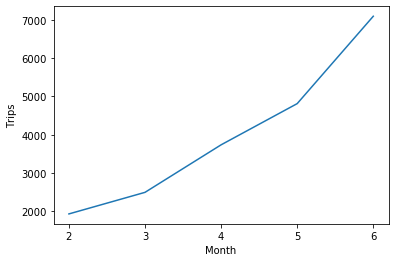

In [45]:
data_m = pd.DataFrame()
data_m['month'] = df.month.value_counts()
data_m.sort_index(inplace=True)
plt.plot(data_m.index, data_m.month, label='Trips in each Month')
plt.ylabel('Trips')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_month.png')
plt.show()

Weekday

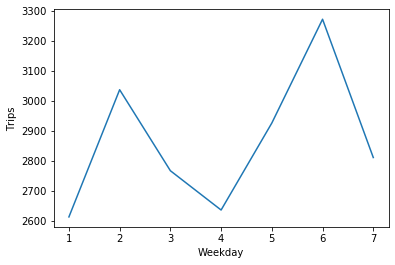

In [46]:
data_w = pd.DataFrame()
data_w['weekday'] = df.weekday.value_counts()
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.weekday, label='Trips on each Weekday')
plt.ylabel('Trips')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_weekday.png')
plt.show()

Daily

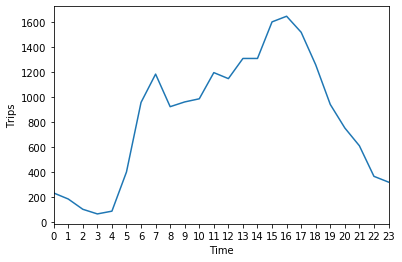

In [47]:
data_d = pd.DataFrame()
data_d['hour'] = df.hour.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.hour, label='Trips in each hour')
plt.ylabel('Trips')
plt.xlabel('Time')
plt.xlim(0, 23)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_hour.png')
plt.show()

Temperature

In [48]:
def replace_minutes(dt):
    return dt.replace(minute=0)

In [49]:
df.rename(columns={'day':'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df_w.datetime = pd.to_datetime(df_w.datetime)
# df.datetime = df['datetime'].astype('datetime64')

In [50]:
# type(df.datetime[0])
# df.datetime = df.datetime.replace(minute=0)
df.datetime = df.datetime.apply(replace_minutes)

In [51]:
df = pd.merge(df, df_w, how="left", on =["datetime"])

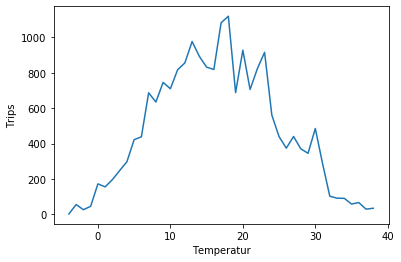

In [52]:
data_d = pd.DataFrame()
df.temperature = df.temperature.astype(int)
data_d['temp'] = df.temperature.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.temp, label='Trips fro each Temperature')
plt.ylabel('Trips')
plt.xlabel('Temperature in C')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_temp.png')
plt.show()

Precipitation

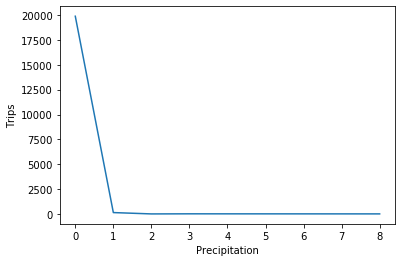

In [58]:
data_d = pd.DataFrame()
df.precipitation = df.precipitation.astype(int)
data_d['prec'] = df.precipitation.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.prec, label='Trips fro each Precipitation')
plt.ylabel('Trips')
plt.xlabel('Precipitation in mm')
# plt.yscale('log')
# plt.gca().xaxis.s
# et_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_prec.png')
plt.show()

**Duration**

Monthly

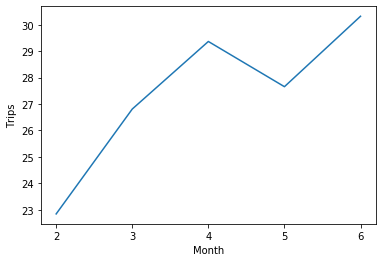

In [69]:
data_du_m = pd.DataFrame()
data_du_m = df[['month', 'trip_duration']]
data_du_m = data_du_m.groupby([data_du_m.month]).mean()

data_du_m.sort_index(inplace=True)
plt.plot(data_du_m.index, data_du_m.trip_duration, label='Mean trip duration each month')
plt.ylabel('Trip Duration in min')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_duration_month.png')
plt.show()

Weekday

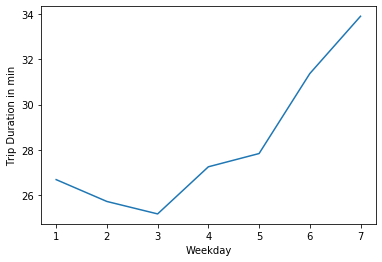

In [71]:
data_du_w = pd.DataFrame()
data_du_w = df[['weekday', 'trip_duration']]
data_du_w = data_du_w.groupby([data_du_w.weekday]).mean()

data_du_w.sort_index(inplace=True)
plt.plot(data_du_w.index, data_du_w.trip_duration, label='Mean trip duration each weekday')
plt.ylabel('Trip Duration in min')
plt.xlabel('Weekday')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.savefig('trip_duration_weekday.png')
plt.show()

Daily

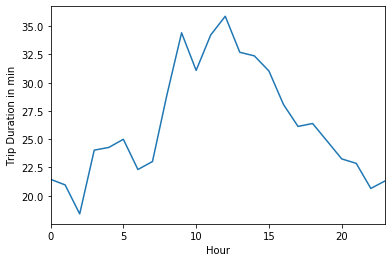

In [77]:
data_du_d = pd.DataFrame()
data_du_d = df[['hour', 'trip_duration']]
data_du_d = data_du_d.groupby([data_du_d.hour]).mean()

data_du_d.sort_index(inplace=True)
plt.plot(data_du_d.index, data_du_d.trip_duration, label='Mean trip duration each hour')
plt.ylabel('Trip Duration in min')
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.savefig('trip_duration_hourly.png')
plt.show()

Temperature

-4 Ist edge case mit 2 fahrten, eine mit 12 min, die andere mit 97 min duration

In [83]:
# df_t = df[df['temperature']== -4]

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


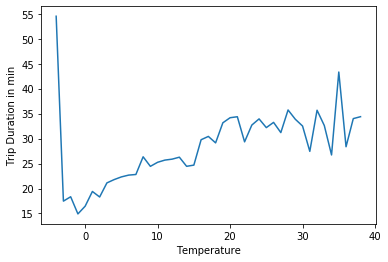

In [84]:
data_du_t = pd.DataFrame()
data_du_t = df[['temperature', 'trip_duration']]
data_du_t = data_du_t.groupby([data_du_t.temperature]).mean()

data_du_t.sort_index(inplace=True)
plt.plot(data_du_t.index, data_du_t.trip_duration, label='Mean trip duration for each temperature')
plt.ylabel('Trip Duration in min')
plt.xlabel('Temperature')
plt.savefig('trip_duration_temp.png')
plt.show()

Precipitation

4 and 8 are edge cases with 13 and 8 trips with unusual long trips

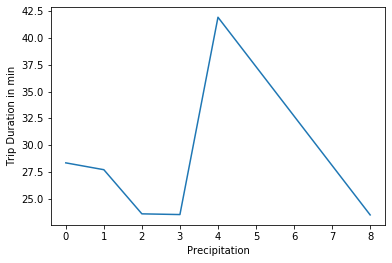

In [86]:
data_du_p = pd.DataFrame()
data_du_p = df[['precipitation', 'trip_duration']]
data_du_p = data_du_p.groupby([data_du_p.precipitation]).mean()

data_du_p.sort_index(inplace=True)
plt.plot(data_du_p.index, data_du_p.trip_duration, label='Mean trip duration for each precipitation')
plt.ylabel('Trip Duration in min')
plt.xlabel('Precipitation')
plt.savefig('trip_duration_prec.png')
plt.show()

In [90]:
df_t = df[df['precipitation']>3]
df_t = df_t[['month',
            'date',
            'hour',
            'min',
            'b_number',
            'trip_duration',
            'precipitation']]